# Identify clusters of pixels by color in a drawing

In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as DF, Series as Ser
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans

from save_figure_per_user import save_figure_per_user

In [98]:
# Read the image
png_path = "/Users/jonathan/Development/programming-studies/MachineLearning/cluster-problem-fx/function-fx-drawing.png"
img = Image.open(png_path)

# Convert to numpy array
png_array = np.asarray(img)
im_height, im_width = (img.height, img.width)

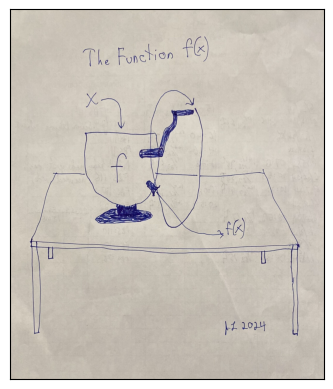

In [99]:
def show_image(img):
    '''Show the image'''
    plt.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    labelleft=False,   # labels along the left edge are off
    labelbottom=False) # labels along the bottom edge are off

    plt.imshow(img, cmap="gray")
    plt.show()

show_image(img)

### Convert image to numpy RGB-array

In [100]:
# Convert to array of RGB-triples (delete alpha-values)
img_rgb = png_array.ravel().reshape(im_height*im_width, 4)[:, :3]
img_rgb

array([[212, 206, 192],
       [212, 206, 192],
       [212, 206, 192],
       ...,
       [201, 193, 183],
       [202, 195, 187],
       [200, 197, 192]], dtype=uint8)

In [101]:
# Convert numpy array of image to dataframe
features = ['r', 'g', 'b']
df = DF(img_rgb)
df.columns = features
pd.concat([df.head(3), df.tail(3)])

,r,g,b
0,212,206,192
1,212,206,192
2,212,206,192
2001405,201,193,183
2001406,202,195,187
2001407,200,197,192


Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-1-RGB-Frequency-Histograms-20240715-180451.png


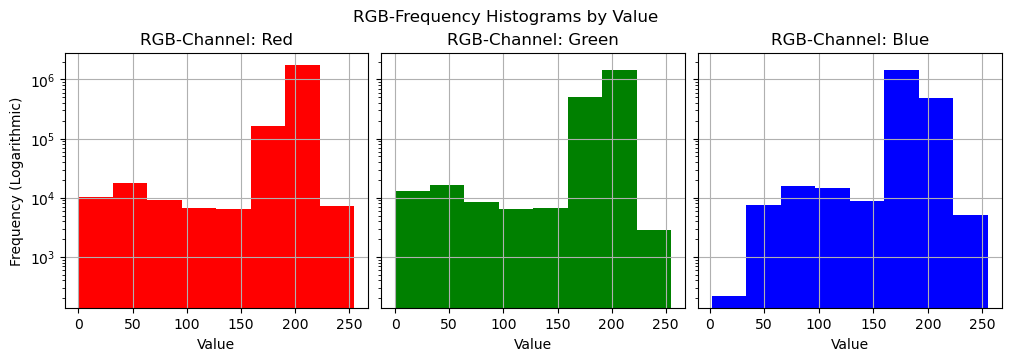

In [102]:
# Make histograms of RGB-colors' frequency by value
colornames = ['Red', 'Green', 'Blue']
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, 
                       layout='constrained')
plt.suptitle("RGB-Frequency Histograms by Value")
for idx, df_onefeature in list(enumerate([df[feature] \
                            for feature in features])):
    ax[idx].hist(df_onefeature, bins=8, color=features[idx])
    ax[idx].grid()
    ax[idx].set_yscale(value='log')
    ax[idx].set_xlabel('Value')
    if idx == 0:
        ax[idx].set_ylabel('Frequency (Logarithmic)')
    ax[idx].set_title('RGB-Channel: ' + colornames[idx])
save_figure_per_user("Fig-1-RGB-Frequency-Histograms")
plt.show()

Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-2-Scatterplots-RGB-Color-Channels-20240715-180457.png


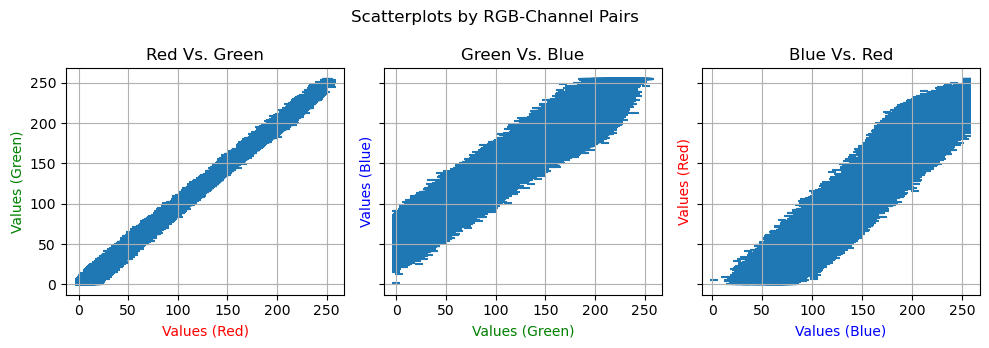

In [103]:
# Perform K-means clustering on pairs of RGB-colors

# First, do scatter graphs:
color_pairs = [['r', 'g'], ['g', 'b'], ['b', 'r']]
colorname_pairs = [['Red', 'Green'], ['Green', 'Blue'], 
                   ['Blue', 'Red']]
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, 
                       layout='tight')
plt.subplots_adjust(wspace=10)
plt.suptitle("Scatterplots by RGB-Channel Pairs")
for idx, df_2cols in list(enumerate([df.loc[:, 
                c_pair] for c_pair in color_pairs])):
    ax[idx].scatter(df_2cols.iloc[:, 0], df_2cols.iloc[:, 1], 
                    marker='_')
    ax[idx].grid()
    ax[idx].set_xlabel('Values (' + colorname_pairs[idx][0] + ')', 
                       color=colorname_pairs[idx][0])
    ax[idx].set_ylabel('Values (' + colorname_pairs[idx][1] + ')', 
                       color=colorname_pairs[idx][1])
    ax[idx].set_title(colorname_pairs[idx][0] + ' Vs. ' + \
                      colorname_pairs[idx][1])
save_figure_per_user("Fig-2-Scatterplots-RGB-Color-Channels")
plt.show()

idx: 0
idx: 1
idx: 2


Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-3-Vis-Eval-Clusters-20240715-180515.png


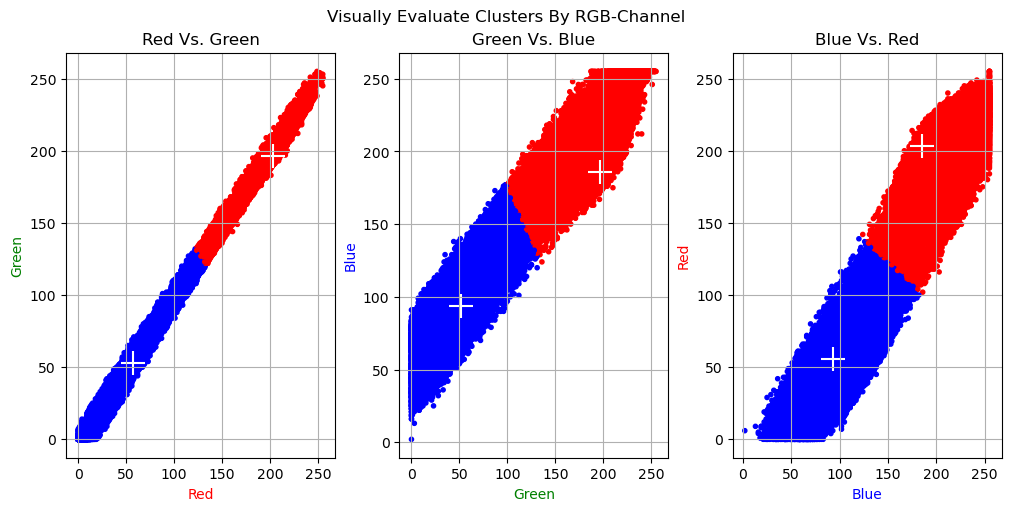

In [104]:
# Cluster the pixels by pairs of RGB channels

# Make an instance of KMeans:
kmeans = KMeans(n_clusters=2, random_state=1)
colormap = np.array(['r', 'b'])
# Visually evaluate the clusters
x = pd.DataFrame(df.loc[:, ['b', 'r']], columns = features)

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=3, 
                       layout='constrained')
for idx, df_2cols in list(enumerate([df.loc[:, 
                c_pair] for c_pair in color_pairs])):
    print("idx:", idx)  # debugging
    x = df.loc[:, color_pairs[idx]]
    kmeans.fit(x)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.suptitle("Visually Evaluate Clusters By RGB-Channel")
    ax[idx].grid()
    ax[idx].scatter(x[color_pairs[idx][0]], x[color_pairs[idx][1]], 
                    c=colormap[labels], marker='.')
    ax[idx].scatter(centroids[:,0], centroids[:,1], s = 300, 
                    marker = '+', c = 'white')

    ax[idx].set_xlabel(colorname_pairs[idx][0], 
                       color=colorname_pairs[idx][0])
    ax[idx].set_ylabel(colorname_pairs[idx][1], 
                       color=colorname_pairs[idx][1])
    ax[idx].set_title(colorname_pairs[idx][0] + ' Vs. ' + \
                      colorname_pairs[idx][1])

save_figure_per_user("Fig-3-Vis-Eval-Clusters")
plt.show()

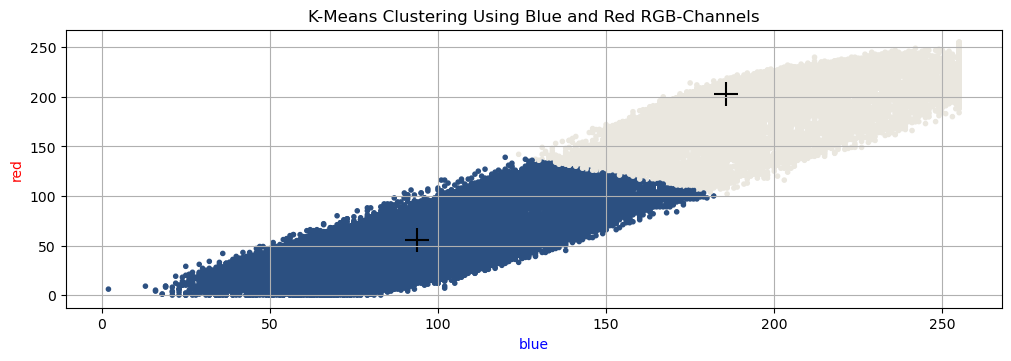

In [105]:
# Visually evaluate the clusters and compare RGB-channels
# Use previous kmeans

# Choose colors for output image
darkcolor, lightcolor = np.array([44, 80, 129]), \
    np.array([234, 231, 223]) # [230, 213, 188], [251, 246, 240] #[209, 202, 192]


labels_br = color_pairs[2] # labels 'b', 'r'
colormap2 = np.array([lightcolor/255, darkcolor/255])
x = df.loc[:, labels_br]
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 3.5), layout='constrained')
plt.title('K-Means Clustering Using Blue and Red RGB-Channels')
plt.grid()
plt.scatter(x[labels_br[0]], x[labels_br[1]], 
            c=colormap2[labels], marker='.')
plt.scatter(centroids[:,0], centroids[:,1], s = 300, 
            marker = '+', c = 'k')

plt.xlabel('blue', color=labels_br[0])
plt.ylabel('red', color=labels_br[1])
plt.show()

In [106]:
x = df.loc[:, ['r', 'b']]
kmeans.fit(x)
predictions = kmeans.predict(x)
df_predics = DF(predictions)
df_predics.columns = ['Class']

# Create new feature containing points' RGB-colors
rgb = [[darkcolor] if i==1 else [lightcolor] for i in predictions]
df_rgb = DF(rgb)
df_rgb.columns = ['RGB']

# Incorporate it into dataset
df_class_rgb = pd.concat([df, df_predics, df_rgb], axis=1)
pd.concat([df_class_rgb.head(2), df_class_rgb.tail(2)])

,r,g,b,Class,RGB
0,212,206,192,0,"[234, 231, 223]"
1,212,206,192,0,"[234, 231, 223]"
2001406,202,195,187,0,"[234, 231, 223]"
2001407,200,197,192,0,"[234, 231, 223]"


In [107]:
dfX = df_class_rgb['RGB']

# Convert it into a numpy array
dfX_ar = np.array(dfX)

# Convert the list elements to  numpy arrays, dropping alphas
ar = np.array([v[:3] for v in dfX_ar])

# Final array to be displayed: reshape and convert dtype
ar_rshp = ar.reshape(im_height, im_width, 3).astype(np.uint8)
print("Output array shape:", ar_rshp.shape)
print("Output array dtype:", ar_rshp.dtype)
print()
print("Output array:")
display(ar_rshp)

Output array shape: (1536, 1303, 3)
Output array dtype: uint8

Output array:


array([[[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]],

       [[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]],

       [[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]],

       ...,

       [[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]],

       [[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]],

       [[234, 231, 223],
        [234, 231, 223],
        [234, 231, 223],
        ...,
        [234, 231, 223],
        [234, 231, 223],
        [234, 231, 223]]

Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-4-function-fx-recolored-20240715-181229.png


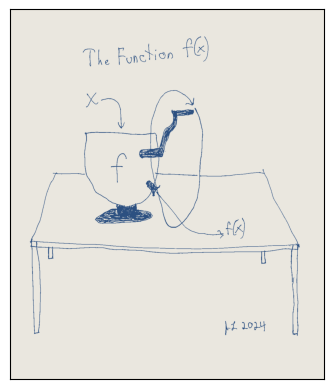

In [108]:
fig, ax = plt.subplots()

plt.tick_params(
axis='both',       # changes apply to both axes
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
left=False,        # ticks along the left edge are off
labelleft=False,   # labels along the left edge are off
labelbottom=False) # labels along the bottom edge are off

ax.imshow(ar_rshp)
save_figure_per_user("Fig-4-function-fx-recolored")
plt.show()

Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-5-combined-images-and-clusters-20240715-181234.png


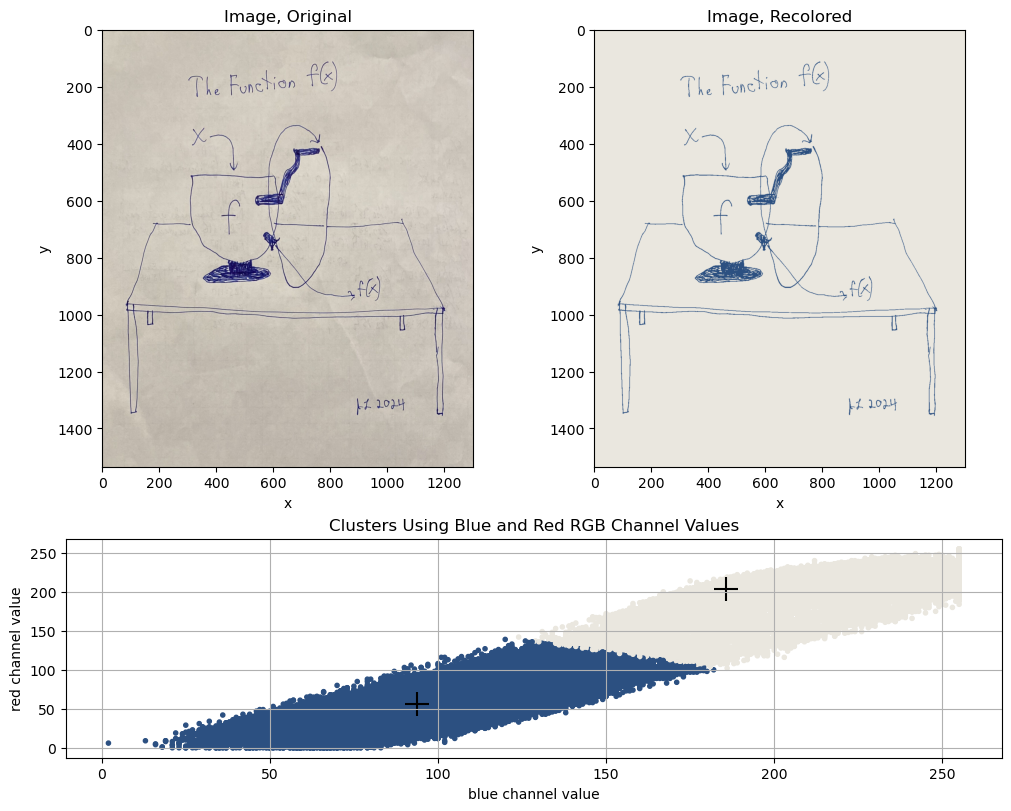

In [109]:
# Create a grid display showing input and output images,
# clusters with centroids
'''
class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, 
bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, 
height_ratios=None)[source]

'''
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 8), layout="constrained")
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 0])
ax1.set_title("Image, Original")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.imshow(img)

ax2 = fig.add_subplot(gs[0:2, 1])
ax2.set_title("Image, Recolored")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.imshow(ar_rshp)

ax3 = fig.add_subplot(gs[2, :])
ax3.set_title('Clusters Using Blue and Red RGB Channel Values')
ax3.grid()
ax3.scatter(x[labels_br[0]], x[labels_br[1]], 
            c=colormap2[labels], marker='.')
ax3.scatter(centroids[:,0], centroids[:,1], s = 300, 
            marker = '+', c = 'k')

ax3.set_xlabel('blue channel value')
ax3.set_ylabel('red channel value')

save_figure_per_user("Fig-5-combined-images-and-clusters")
plt.show()